In [130]:
# Importing data loading libraries
import pandas as pd
import numpy as np


# Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Importing statistical analysis libraries 
from scipy.stats import ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('data/creditcard.csv')

## **Basic Exploration**
* Dataset shape: (284807, 31)
* Dtypes: All columns are float except the target which is `int64`
* No column has missing value

In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## **Target Exploration**
* Dataset is imbalanced, class-1 has only 0.17% contribution.

In [5]:
print('Class-frequency:\n', data['Class'].value_counts())
print()
print('Class-Distributino:\n', round(data['Class'].value_counts(normalize=True)*100,2))

Class-frequency:
 0    284315
1       492
Name: Class, dtype: int64

Class-Distributino:
 0    99.83
1     0.17
Name: Class, dtype: float64


## **Checking Outliers**
* `Amount` and other PCA features have outliers but they perhaps be fraud cases, hence, need further investigation.

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


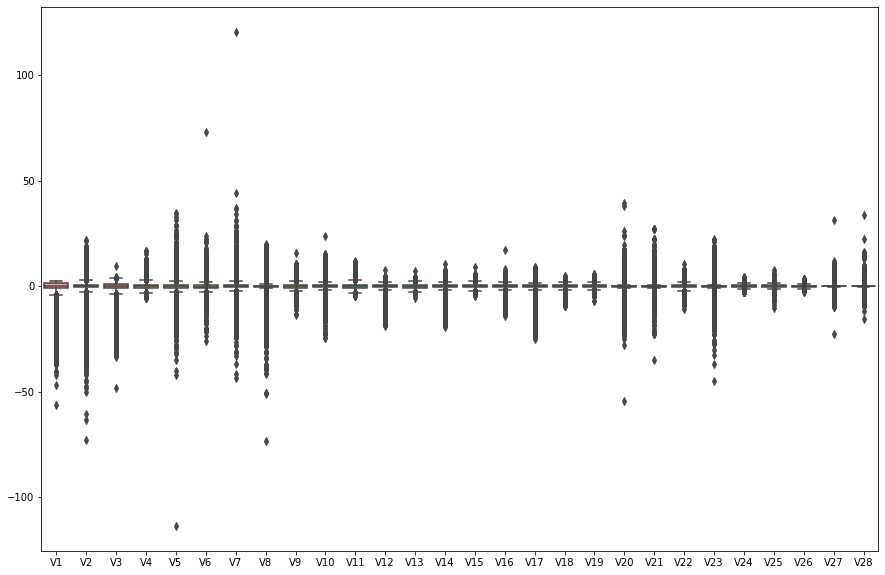

In [8]:
plt.figure(figsize=(15,10))
sns.boxplot(data.drop(columns=['Time', 'Amount', 'Class']))
plt.show()

<AxesSubplot:>

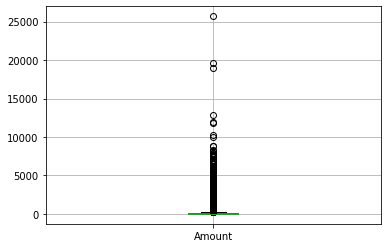

In [9]:
data[['Amount']].boxplot()

## **Bivariate Analysis**
### **Quantative Vs Qualitative**
* t-test showing V8, V22, V23, and V25 does not have statistically significant impact on target variable.
* Dropped these variable from the dataset.


In [10]:
def ttest_util(df, col):
    l = list(df.groupby('Class')[col].apply(np.array))
    var_l1 = l[0].var()
    var_l2 = l[1].var()
    return l[0], l[1], var_l2/var_l1<=4 and var_l2/var_l1>=0.25

In [11]:
def ttest(df):

    cols = df.columns.drop('Class')

    for col in cols:
        a, b, equal_var = ttest_util(df, col)
        _, p_value = ttest_ind(a, b, equal_var=equal_var)
        print(f'p-value for {col} is: {p_value}')

In [12]:
ttest(data)

p-value for Time is: 4.8182688917960346e-11
p-value for V1 is: 5.4916429825378326e-45
p-value for V2 is: 1.2885797612095705e-59
p-value for V3 is: 4.7860814074282e-75
p-value for V4 is: 4.587316921388042e-136
p-value for V5 is: 1.4970277071054122e-33
p-value for V6 is: 4.2131113453230875e-120
p-value for V7 is: 4.2922313194412136e-52
p-value for V8 is: 0.06275811803424983
p-value for V9 is: 1.1935046623364425e-79
p-value for V10 is: 3.382883650613687e-93
p-value for V11 is: 4.577212375356592e-120
p-value for V12 is: 1.4813165028380743e-112
p-value for V13 is: 0.014737338961005653
p-value for V14 is: 1.040150709902715e-140
p-value for V15 is: 0.02420142600145766
p-value for V16 is: 7.905325639437749e-84
p-value for V17 is: 1.5580938057841998e-71
p-value for V18 is: 2.6392225457940417e-52
p-value for V19 is: 5.801517302142051e-77
p-value for V20 is: 7.964292023532662e-27
p-value for V21 is: 4.882129855322934e-05
p-value for V22 is: 0.8346791940015029
p-value for V23 is: 0.571040215424827

In [13]:
data = data.drop(columns=['V8', 'V22', 'V23', 'V25'])

### **Quantative Vs Quantative**
* Data has PCA components as most of the features resulting into correlation zero.
* Amount is correlated and can be derived from rest of the feaures. 

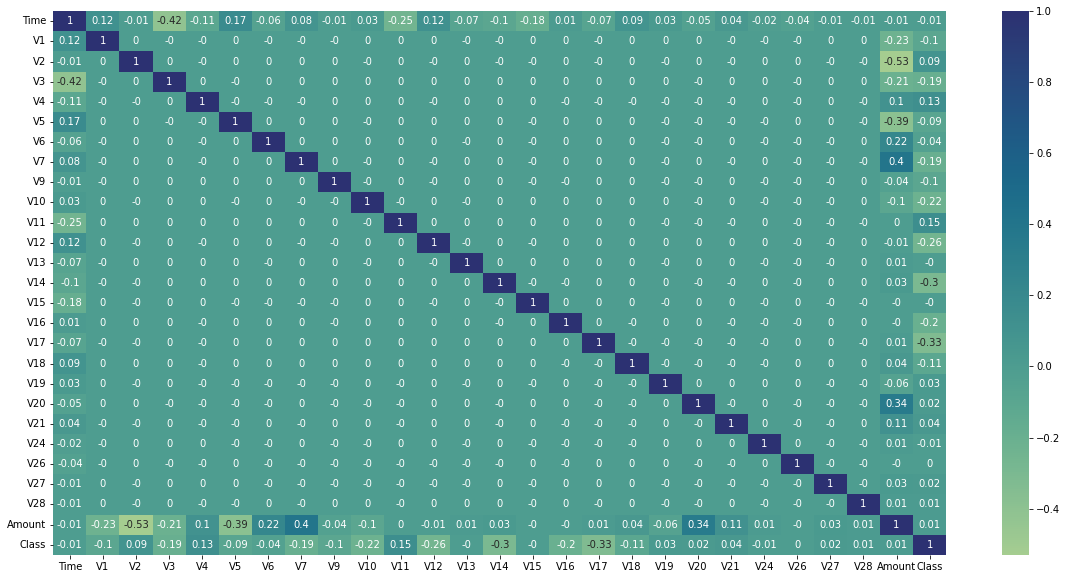

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(round(data.corr(),2), annot=True, cmap = 'crest')
plt.show()

### **Checking MultiCollinearity**

In [15]:
def cal_vif(data, col):
    return variance_inflation_factor(data.values, list(data.columns).index(col))

In [16]:
for col in ['Amount', 'Time']:
    print('VIF-factor value for Amount is:', cal_vif(data, col))

VIF-factor value for Amount is: 8.685883234406392
VIF-factor value for Amount is: 1.9868843018835156


## **Utils**

In [93]:
from sklearn.base import TransformerMixin
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import ClusterCentroids

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import classification_report, make_scorer


In [94]:
class Scaler(TransformerMixin):
    def __init__(self):
        self.scaler = RobustScaler()
    
    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self
    
    def transform(self, X):
        return self.scaler.transform(X)

In [95]:
def au_pr_curve(y_act, y_pred):

    from sklearn.metrics import precision_recall_curve, auc
    precision, recall, _ = precision_recall_curve(y_act, y_pred)
    auprc = auc(recall, precision)
    return auprc


In [96]:
def custom_scorer():
    return make_scorer(au_pr_curve, response_method="predict_proba")

In [117]:
def get_TopkFeatures(X, y, k, estimator = LogisticRegression()):
    columns = X.columns
    X = Scaler().fit_transform(X)
    estimator_ = RFE(estimator=estimator)
    params_dict = {'n_features_to_select': k}
    model = GridSearchCV(estimator_, param_grid=params_dict, scoring=custom_scorer())
    model.fit(X, y)
    selected_features = columns[model.best_estimator_.support_]
    return selected_features 

In [98]:
def smote_enn(X, y):
    sme = SMOTEENN(random_state = 42)
    X_res, y_res = sme.fit_resample(X, y)
    return X_res, y_res


In [99]:
def undersampling(X, y):
    cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42,
    sampling_strategy=0.2
    )
    X_res, y_res = cc.fit_resample(X, y)
    return X_res, y_res

## **Modeling**

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [21]:
def get_splits(X, y, dev_prop = 0.15, test_prop = 0.15):

    tr_X, test_X, tr_y, test_y = train_test_split(X, y, test_size=test_prop, random_state=42, stratify=y)
    train_X, dev_X, train_y, dev_y = train_test_split(tr_X, tr_y, test_size=dev_prop/(1-test_prop), random_state=42, stratify=tr_y)

    return train_X, dev_X, test_X, train_y, dev_y, test_y


In [100]:
def prepare_data(data, scaling = False):
    df = data.copy()
    df = shuffle(df, random_state=True)

    X = data.drop('Class', axis=1)
    y = data['Class']

    return X, y

In [101]:
def get_report(y_act, y_pred):
    print(classification_report(y_act, y_pred))

In [147]:
def get_model(model_name):
    if model_name=='Logistic_Regression':
        return (
            model_name,
            LogisticRegression(),
            {}
        )
    elif model_name=='DecisionTree':
        return (
            model_name,
            DecisionTreeClassifier(),
            {
                'max_depth': [5, 10, 20, 50],
                'min_samples_leaf': [1, 2, 5],
                'min_samples_split': [2, 5]
            }
        )
    elif model_name=='RandomForest':
        return (
            model_name,
            RandomForestClassifier(),
            {
                'max_depth': [5, 10, 20, 50],
                'min_samples_leaf': [1, 2, 5],
                'min_samples_split': [2, 5],
                'n_estimators': [50, 100, 300]
            }
        )
    elif model_name=='XGBoost':
        return (
            model_name,
            XGBClassifier(),
            {
                'eta': [0.01, 0.05, 0.1, 0.3],
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 4, 5, 6],
                'min_child_weight': [1, 5, 10, 20],
                'gamma': [0, 0.1, 0.2, 0.3],
                'subsample': [0.6, 0.8, 0.9],
                'colsample_bytree': [0.6, 0.8, 0.9]
            }
        )
    else:
        raise Exception('Plese select model name from: ["XGBoost", "DecisionTree", "RandomForest", "Logistic_Regression"]')
    

### **Logistic Regression**

In [103]:
class LR:
    def __init__(self) -> None:
        pass

    def fit(self, X_train, y_train, X_dev=None, y_dev=None):

        # feature scaling
        print('Scaling the features ...')
        self.scaler = Scaler()
        X_train = pd.DataFrame(self.scaler.fit_transform(X_train), columns=X_train.columns)
        
        # class balancing 
        print('Balancing the class ...')
        print('Class distribution before resampling:\n', y_train.value_counts())
        print()
        X_train, y_train = undersampling(X_train, y_train)
        print('Class distribution after resampling:\n', y_train.value_counts())
        
        
        # Loading and fitting model
        print('fitting the model ...')
        self.name, model, params_dict = get_model('Logistic_Regression')

        if X_dev is not None:
            cv_indices = np.append(np.full(X_train.shape[0], -1), np.full(X_dev.shape[0], 0))
            X_train = pd.concat([X_train, X_dev])
            y_train = pd.concat([y_train, y_dev])
            model = GridSearchCV(model, param_grid=params_dict, cv = PredefinedSplit(cv_indices))
        else:
            model = GridSearchCV(model, param_grid=params_dict)
            print('Best parameters are:', model.best_params_)
        
        model.fit(X_train, y_train)
        
        self.model = model.best_estimator_

In [104]:
X, y = prepare_data(data)
train_X, dev_X, test_X, train_y, dev_y, test_y = get_splits(X,y)

log_reg = LR()
log_reg.fit(train_X, train_y, dev_X, dev_y)

Scaling the features ...
Balancing the class ...
Class distribution before resampling:
 0    199020
1       344
Name: Class, dtype: int64

Class distribution after resampling:
 0    1720
1     344
Name: Class, dtype: int64
fitting the model ...


/home/tushar/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
y_pred = log_reg.model.predict(test_X)
y_pred_probs = log_reg.model.predict_proba(test_X)[:,1]

In [106]:
print('Area Under Precision-Recall curve is: ', au_pr_curve(test_y, y_pred_probs))
print()
get_report(test_y, y_pred)

Area Under Precision-Recall curve is:  0.5971785349583383

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.79      0.73      0.76        74

    accuracy                           1.00     42722
   macro avg       0.90      0.86      0.88     42722
weighted avg       1.00      1.00      1.00     42722



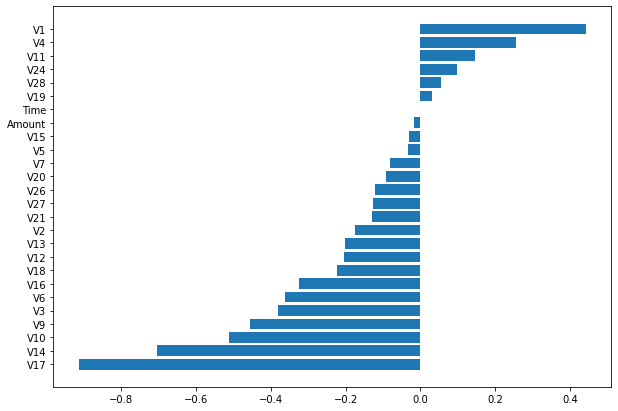

In [107]:
feature_importance = pd.DataFrame({'Feature': train_X.columns, 'Importance': log_reg.model.coef_.ravel()}).sort_values(by = 'Importance')
plt.figure(figsize=(10,7))
# feature_importance.plot(kind = 'barh', x='Feature', y='Importance')
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.show();

### **Decision-Tree**

In [114]:
# preparing train/dev/test splits
X, y = prepare_data(data)
train_X, dev_X, test_X, train_y, dev_y, test_y = get_splits(X,y)

In [115]:
# performing undersampling
train_X, train_y = undersampling(train_X, train_y)

In [122]:
# selecting top-k best features
selected_features = get_TopkFeatures(train_X, train_y, [5, 7, 10, 15])

/home/tushar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/tushar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/tushar/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 267, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
TypeError: au_pr_curve() got an unexpected keyword argument 'response_method'

  warnings.warn(
/home/tushar/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will

Index(['V2', 'V4', 'V13', 'V14', 'V26'], dtype='object')

In [123]:
selected_features

Index(['V2', 'V4', 'V13', 'V14', 'V26'], dtype='object')

In [121]:
train_X = train_X[selected_features]
dev_X = dev_X[selected_features]
test_X = test_X[selected_features]

In [126]:
# setting cv for cross-validation

cv_indices = np.append(np.full(train_X.shape[0], -1), np.full(dev_X.shape[0], 0))
train_X = pd.concat([train_X, dev_X])
train_y = pd.concat([train_y, dev_y])


In [133]:
# fitting decision tree model with hyperparameter tuning

_, dt_model, dt_params = get_model('DecisionTree')
dt_model = GridSearchCV(dt_model, param_grid=dt_params, scoring=custom_scorer(), cv=PredefinedSplit(cv_indices))

dt_model.fit(train_X, train_y)
print('Best parameters are:', dt_model.best_params_)

Best parameters are: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [134]:
y_pred = dt_model.best_estimator_.predict(test_X)
y_pred_probs = dt_model.best_estimator_.predict_proba(test_X)[:,1]

In [137]:
print('Area Under Precision Recall curve is: ',au_pr_curve(test_y, y_pred_probs))
print()
get_report(test_y, y_pred)

Area Under Precision Recall curve is:  0.60709720535426

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.61      0.74      0.67        74

    accuracy                           1.00     42722
   macro avg       0.81      0.87      0.84     42722
weighted avg       1.00      1.00      1.00     42722



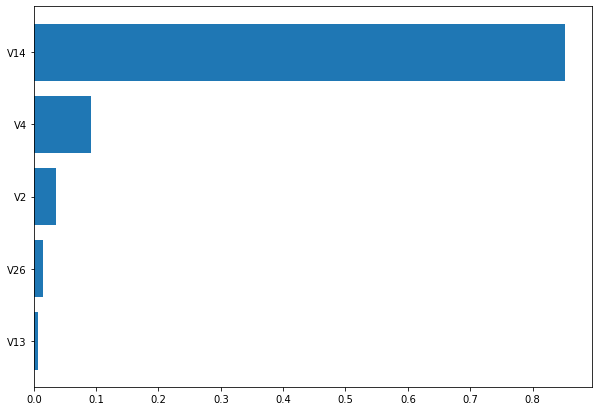

In [136]:
feature_importance = pd.DataFrame({'Feature': train_X.columns, 'Importance':
                                   dt_model.best_estimator_.feature_importances_.ravel()}).sort_values(by = 'Importance')
plt.figure(figsize=(10,7))
# feature_importance.plot(kind = 'barh', x='Feature', y='Importance')
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.show();

### **Random Forest**

In [142]:
# fitting random forest model with hyperparameter tuning

_, rf_model, rf_params = get_model('RandomForest')
rf_model = GridSearchCV(rf_model, param_grid=rf_params, scoring=custom_scorer(), cv=PredefinedSplit(cv_indices))

rf_model.fit(train_X, train_y)
print('Best parameters are:', rf_model.best_params_)

Best parameters are: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [143]:
y_pred = rf_model.best_estimator_.predict(test_X)
y_pred_probs = rf_model.best_estimator_.predict_proba(test_X)[:,1]

In [144]:
print('Area Under Precision Recall curve is: ',au_pr_curve(test_y, y_pred_probs))
print()
get_report(test_y, y_pred)

Area Under Precision Recall curve is:  0.6396727674661061

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.67      0.77      0.72        74

    accuracy                           1.00     42722
   macro avg       0.84      0.88      0.86     42722
weighted avg       1.00      1.00      1.00     42722



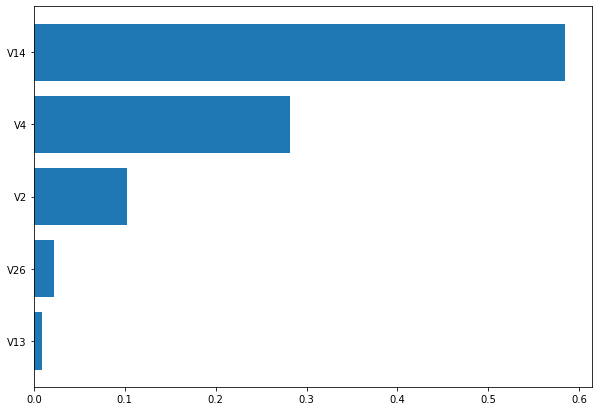

In [145]:
feature_importance = pd.DataFrame({'Feature': train_X.columns, 'Importance':
                                   rf_model.best_estimator_.feature_importances_.ravel()}).sort_values(by = 'Importance')
plt.figure(figsize=(10,7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.show();

### **XGBoost**

In [148]:
# fitting XGBoost model with hyperparameter tuning

_, xgb_model, xgb_params = get_model('XGBoost')
xgb_model = GridSearchCV(xgb_model, param_grid=xgb_params, scoring=custom_scorer(), cv=PredefinedSplit(cv_indices))

xgb_model.fit(train_X, train_y)
print('Best parameters are:', xgb_model.best_params_)

Best parameters are: {'colsample_bytree': 0.6, 'eta': 0.01, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}


In [149]:
y_pred = xgb_model.best_estimator_.predict(test_X)
y_pred_probs = xgb_model.best_estimator_.predict_proba(test_X)[:,1]

In [150]:
print('Area Under Precision Recall curve is: ',au_pr_curve(test_y, y_pred_probs))
print()
get_report(test_y, y_pred)

Area Under Precision Recall curve is:  0.6126527253210121

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42648
           1       0.67      0.68      0.67        74

    accuracy                           1.00     42722
   macro avg       0.83      0.84      0.84     42722
weighted avg       1.00      1.00      1.00     42722



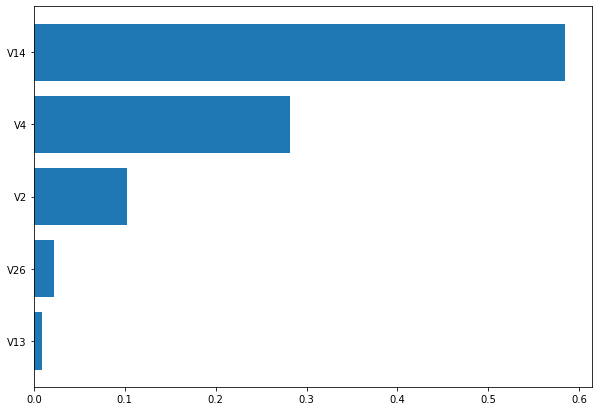

In [151]:
feature_importance = pd.DataFrame({'Feature': train_X.columns, 'Importance':
                                   rf_model.best_estimator_.feature_importances_.ravel()}).sort_values(by = 'Importance')
plt.figure(figsize=(10,7))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.show();